# 00. Handle Data Types

### Import deps

In [50]:
import pandas as pd
import numpy as np

### Load Data

In [51]:
df = pd.read_csv(
    "../data/raw/raw.csv"
    )

In [52]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [53]:
df.iloc[:2, :10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes


In [54]:
df.iloc[:2, 10:]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [55]:
processed_df = df.copy()

### Categorical Data

In [72]:
categorical_features = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService","MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
]

target_feature = "Churn"

In [57]:
processed_df.dtypes

customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

#### SeniorCitizen Data Type Handle 

In [58]:
processed_df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [59]:
processed_df["SeniorCitizen"] = processed_df["SeniorCitizen"].map({0 : "No", 1: "Yes"})

In [60]:
processed_df.dtypes

customerID              str
gender                  str
SeniorCitizen           str
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

### Numerical Data

In [61]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

In [62]:
processed_df["TotalCharges"].value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.9       8
20.05      8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [63]:
processed_df["TotalCharges"] = processed_df["TotalCharges"].replace(" ", np.nan)

In [64]:
processed_df["TotalCharges"].value_counts()

TotalCharges
20.2      11
19.75      9
19.9       8
20.05      8
19.65      8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [65]:
processed_df["TotalCharges"] = processed_df["TotalCharges"].astype("float64")

In [66]:
processed_df.dtypes

customerID              str
gender                  str
SeniorCitizen           str
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges        float64
Churn                   str
dtype: object

### Save the df

In [ ]:
processed_df.to_csv(
        "../data/processed/data_type_handled.csv",
        index=False
      )

# 01. Handle Missing Vals

### Import deps

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

### Load Data

In [ ]:
df = pd.read_csv(
    "../data/processed/data_type_handled.csv",
    )

In [70]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen           str
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges        float64
Churn                   str
dtype: object

In [73]:
null_handled_df = df.copy()

### Analyze Data

In [74]:
null_handled_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### handle "TotalCharge" Column

In [75]:
null_handled_df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<Axes: xlabel='TotalCharges', ylabel='Count'>

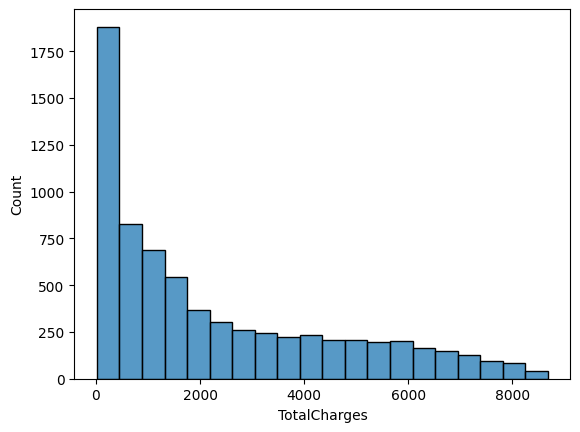

In [76]:
sns.histplot(null_handled_df.TotalCharges, bins=20)

#### i. impute the median

In [78]:
null_handled_df["TotalCharges"] = null_handled_df["TotalCharges"].fillna(
    null_handled_df["TotalCharges"].median()
    )

In [79]:
null_handled_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Save Final CSV

In [ ]:
null_handled_df.to_csv(
    "../data/processed/null_values_handled.csv",
    index=False
    )

# 02. Handling Outliers

### Import deps

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [ ]:
df = pd.read_csv(
    "../data/processed/null_values_handled.csv"
    )

In [133]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen           str
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges        float64
Churn                   str
dtype: object

In [134]:
df.iloc[:5,:10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No


In [135]:
df.iloc[:5,10:]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Viz

In [137]:
unique_vals = {
    "categorical_feature" : [],
    "num_uniques" : [],
    "uniques": []
}
for i, cat_feature in enumerate(categorical_features):
    unique_vals["categorical_feature"].append(cat_feature)
    unique_vals["uniques"].append(df[cat_feature].unique())
    unique_vals["num_uniques"].append(len(unique_vals["uniques"][i]))

unique_vals_df = pd.DataFrame(unique_vals)

In [138]:
unique_vals_df.sort_values(by="num_uniques", ascending=True)

,categorical_feature,num_uniques,uniques
0,gender,2,"[Female, Male]"
1,SeniorCitizen,2,"[No, Yes]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,PhoneService,2,"[No, Yes]"
14,PaperlessBilling,2,"[Yes, No]"
6,InternetService,3,"[DSL, Fiber optic, No]"
5,MultipleLines,3,"[No phone service, No, Yes]"
7,OnlineSecurity,3,"[No, Yes, No internet service]"
8,OnlineBackup,3,"[Yes, No, No internet service]"


In [139]:
categorical_columns = {
    "nominal_columns":[ 'gender',
                        'SeniorCitizen',
                        'Partner',
                        'Dependents',
                        'PhoneService',
                        'MultipleLines',
                        'InternetService',
                        'OnlineSecurity',
                        'OnlineBackup',
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV',
                        'StreamingMovies',
                        'PaperlessBilling',
                        'PaymentMethod',
                        'Churn'],
    "ordinal_columns":['Contract',] # We can order by the length of the commitement
}

numerical_columns = {
    'discrete_columns': ['tenure'],
    'cts_columns': ['MonthlyCharges',
                    'TotalCharges']
}


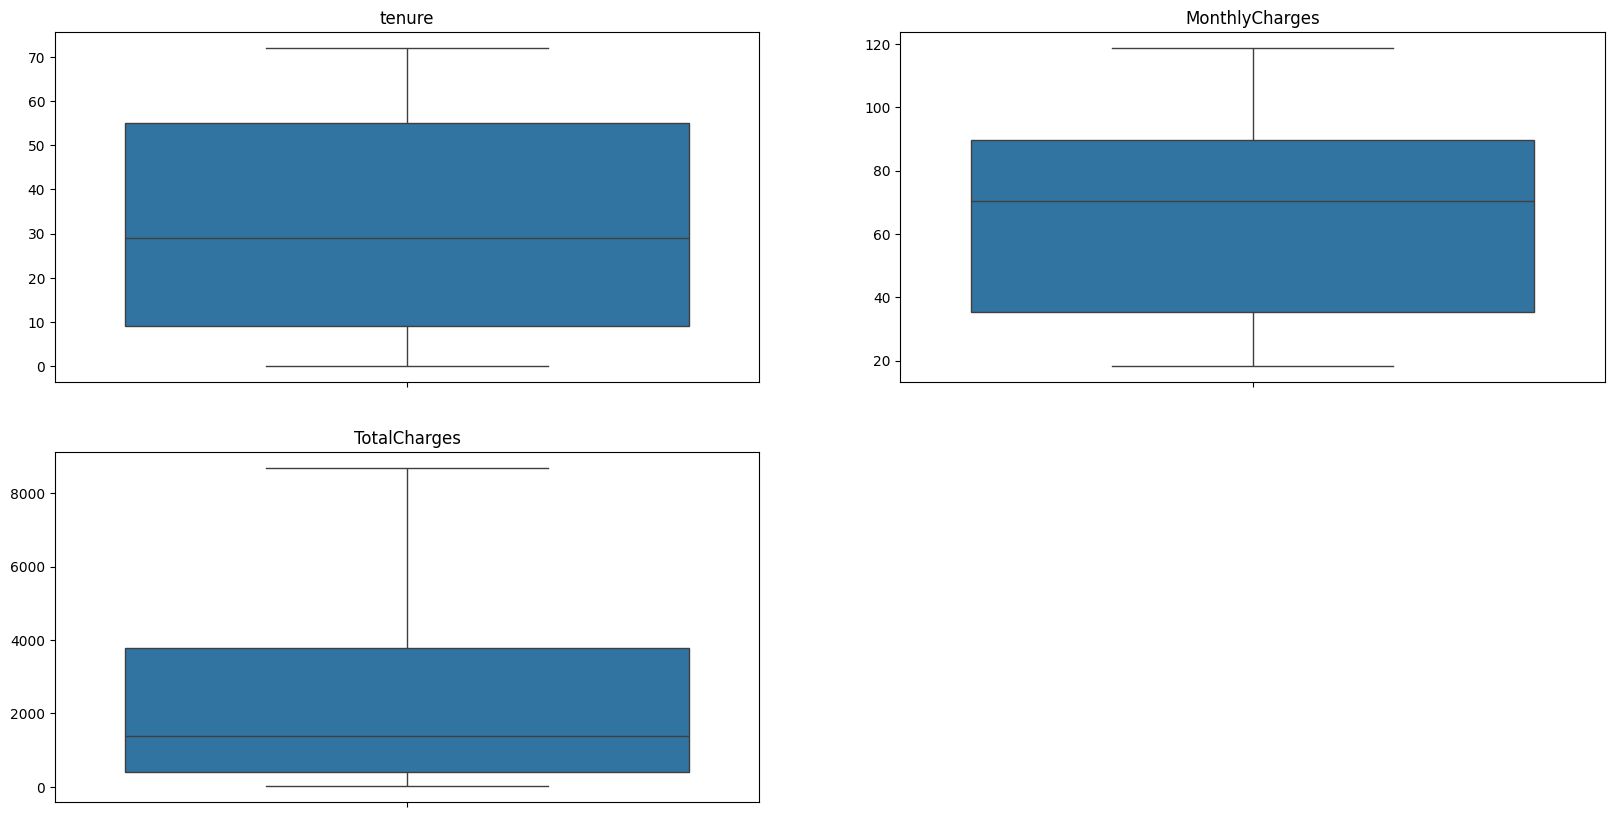

In [140]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(
    numerical_columns["discrete_columns"]
    + numerical_columns["cts_columns"]):
  sns.boxplot(
      df[col],
      ax=axes[idx]
  )
  axes[idx].set_ylabel('')
  axes[idx].set_title(col)
fig.delaxes(axes[3])

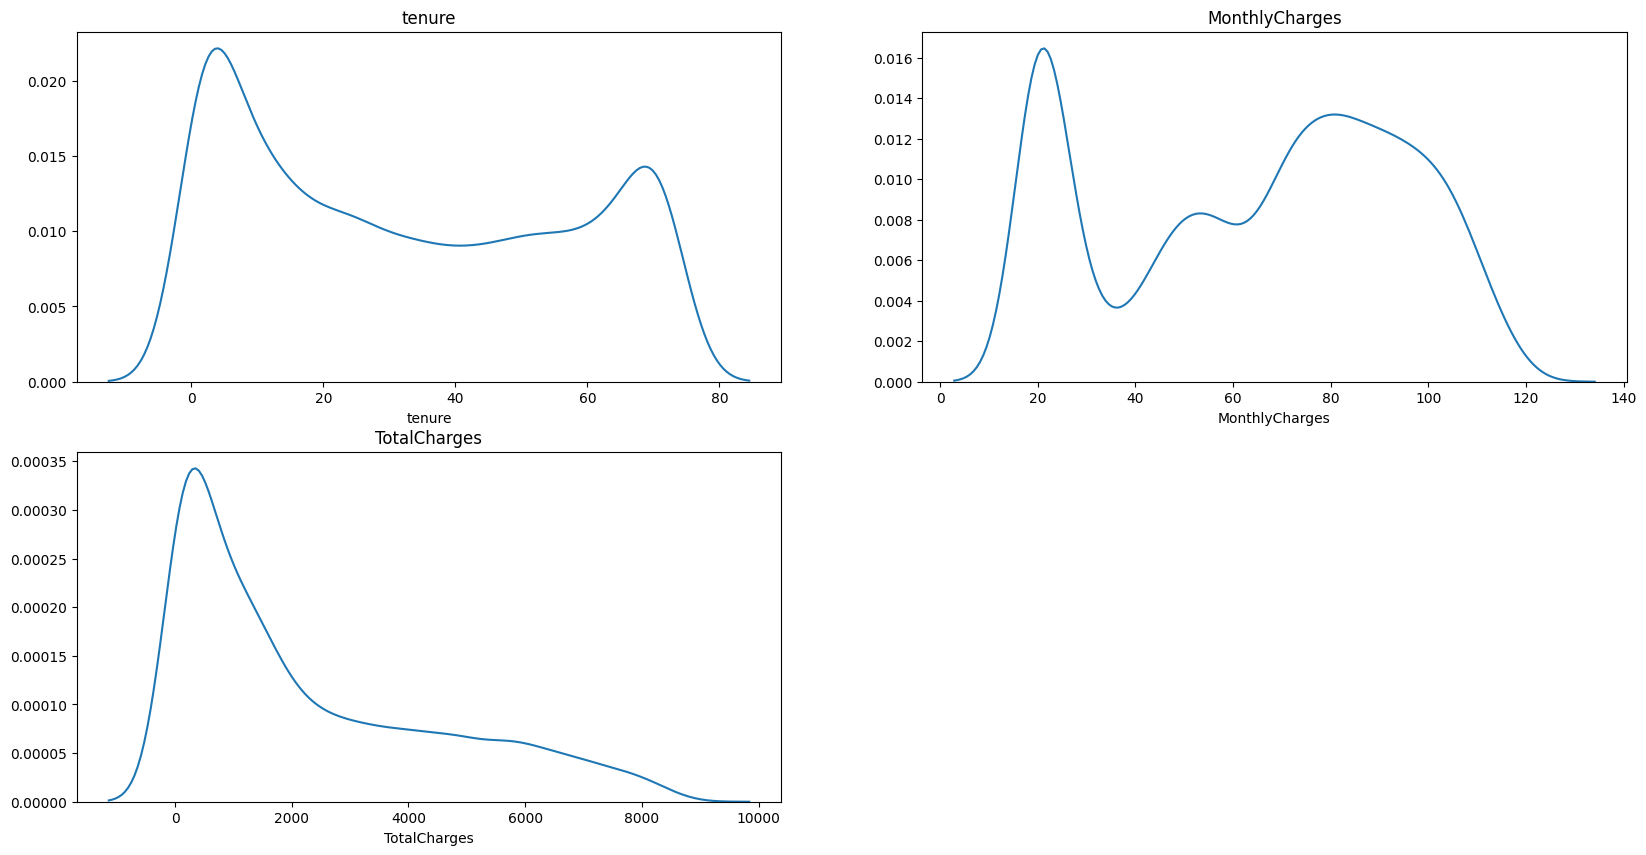

In [143]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(
    numerical_columns["discrete_columns"]
    + numerical_columns["cts_columns"]):
  sns.kdeplot(
      df[col],
      ax=axes[idx]
  )
  axes[idx].set_ylabel('')
  axes[idx].set_title(col)
fig.delaxes(axes[3])
  

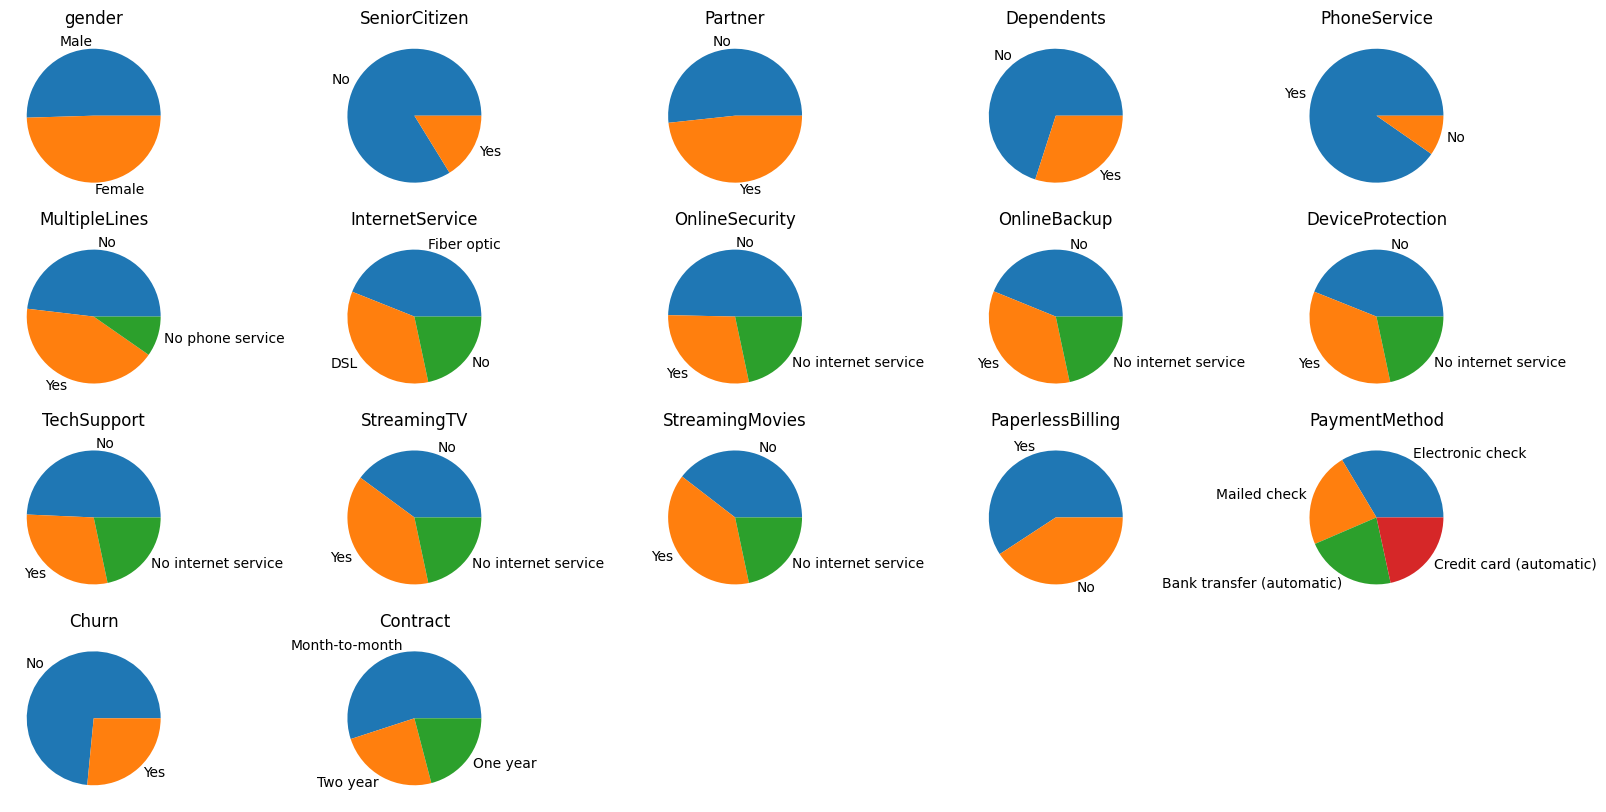

In [142]:
fig, axes = plt.subplots(4,5, figsize=(20, 10))
axes = axes.flatten()
cat_columns = categorical_columns["nominal_columns"]+categorical_columns["ordinal_columns"]
for idx, col in enumerate(cat_columns):
  df[col].value_counts().plot(
      kind="pie",
      ax=axes[idx]
  )
  axes[idx].set_ylabel('')
  axes[idx].set_title(col)
for idx in range(len(cat_columns), 4*5 ):
    fig.delaxes(axes[idx])

### By Empirical Rule/ 3 Sigma Method

In [144]:
def find_anomaly(data):
  mean = data.mean()
  std = data.std()

  upper_bound = mean + 3 * std
  lower_bound = mean - 3 * std

  return  (data > upper_bound) | (data < lower_bound)

In [145]:
for idx, col in enumerate(
                          numerical_columns["discrete_columns"]
                          + numerical_columns["cts_columns"]
                          ):
  anomalies = find_anomaly(df[col])
  count = anomalies.sum()
  total = len(df[col])
  percentage = count/total * 100
  print(f"{col} | Anomalies : {count} | {percentage}%")

tenure | Anomalies : 0 | 0.0%
MonthlyCharges | Anomalies : 0 | 0.0%
TotalCharges | Anomalies : 0 | 0.0%


### By IQR

In [146]:
def find_anomaly(data):
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1

  upper_bound = q3 + 1.5 * iqr
  lower_bound = q1 - 1.5 * iqr

  return  (data > upper_bound) | (data < lower_bound)

In [147]:
for idx, col in enumerate(
                          numerical_columns["discrete_columns"]
                          + numerical_columns["cts_columns"]
                          ):
  anomalies = find_anomaly(df[col])
  count = anomalies.sum()
  total = len(df[col])
  percentage = count/total * 100
  print(f"{col} | Anomalies : {count} | {percentage}%")

tenure | Anomalies : 0 | 0.0%
MonthlyCharges | Anomalies : 0 | 0.0%
TotalCharges | Anomalies : 0 | 0.0%


### Save CSV

In [ ]:
df.to_csv(
    "../data/processed/outliers_handled.csv"
    ,index=False
    )

# 03. Feature Binning

### Import deps

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [ ]:
df = pd.read_csv(
    "../data/processed/outliers_handled.csv"
    )

In [151]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen           str
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges        float64
Churn                   str
dtype: object

In [152]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [153]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Save CSV

In [ ]:
df.to_csv(
    "../data/processed/binning_applied.csv"
    ,index=False
    )

# 04. Feature Encoding

### Import deps

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [ ]:
df = pd.read_csv(
    "../data/processed/binning_applied.csv"
    )

In [157]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen           str
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges        float64
Churn                   str
dtype: object

In [162]:
df.iloc[:3, :10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes


In [163]:
df.iloc[:3, 10:]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [159]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [160]:
processing_df = df.copy()

In [161]:
processing_df = processing_df.drop(["customerID"], axis=1)

In [ ]:
categorical_columns = {
    "nominal_columns":[ 'gender',
                        'SeniorCitizen',
                        'Partner',
                        'Dependents',
                        'PhoneService',
                        'MultipleLines',
                        'InternetService',
                        'OnlineSecurity',
                        'OnlineBackup',
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV',
                        'StreamingMovies',
                        'PaperlessBilling',
                        'PaymentMethod',
                        'Churn'],
    "ordinal_columns":['Contract',]
}

numerical_columns = {
    'discrete_columns': ['tenure'],
    'cts_columns': ['MonthlyCharges',
                    'TotalCharges']
}


### Nominal encoding

In [164]:
nominal_features = categorical_columns["nominal_columns"][:-1]
for feature in nominal_features:
  tmp_encoded_df = pd.get_dummies(processing_df[feature], prefix=feature).astype(int)
  processing_df = pd.concat([processing_df, tmp_encoded_df], axis=1)
  del processing_df[feature]

In [165]:
processing_df.columns

Index(['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'Paperles

### Ordinal Encoding

In [166]:
unique_vals_df

,categorical_feature,num_uniques,uniques
0,gender,2,"[Female, Male]"
1,SeniorCitizen,2,"[No, Yes]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,PhoneService,2,"[No, Yes]"
5,MultipleLines,3,"[No phone service, No, Yes]"
6,InternetService,3,"[DSL, Fiber optic, No]"
7,OnlineSecurity,3,"[No, Yes, No internet service]"
8,OnlineBackup,3,"[Yes, No, No internet service]"
9,DeviceProtection,3,"[No, Yes, No internet service]"


In [167]:
mappings_label_encoding = {
    "Churn" : {
        "Yes" : 1,
        "No" : 0,
    },
    "Contract" : {
        "Month-to-month" : 0,
        "One year" : 1,
        "Two year" : 2,
    }
}

In [169]:
ordinal_features = categorical_columns["ordinal_columns"] + ["Churn"]
for feature in ordinal_features:
  processing_df[feature] = processing_df[feature].map(mappings_label_encoding[feature])


In [173]:
processing_df.iloc[:3, :12]

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No
0,1,0,29.85,29.85,0,1,0,1,0,0,1,1
1,34,1,56.95,1889.50,0,0,1,1,0,1,0,1
2,2,0,53.85,108.15,1,0,1,1,0,1,0,1


In [175]:
processing_df.iloc[:3, 12:20]

,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic
0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,0,1,0
2,0,0,1,1,0,0,1,0


In [177]:
processing_df.iloc[:3, 20: 28]

,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No
0,0,1,0,0,0,0,1,1
1,0,0,0,1,1,0,0,0
2,0,0,0,1,0,0,1,1


In [182]:
processing_df.iloc[:3, 28:35]

,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service
0,0,0,1,0,0,1,0
1,0,1,1,0,0,1,0
2,0,0,1,0,0,1,0


In [185]:
processing_df.iloc[:3, 35:42]

,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic)
0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0
2,0,1,0,0,0,1,0


In [186]:
processing_df.iloc[:3, 42:]

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0
1,0,0,1
2,0,0,1


### Save CSV

In [ ]:
processing_df.to_csv(
    "../data/processed/feature_encoding_handled.csv"
    ,index=False
    )

# 05. Feature Scaling

### Import deps

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Load Data

In [ ]:
df = pd.read_csv(
    "../data/processed/feature_encoding_handled.csv"
    )

In [190]:
df.dtypes

tenure                                       int64
Contract                                     int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                int64
gender_Male                                  int64
SeniorCitizen_No                             int64
SeniorCitizen_Yes                            int64
Partner_No                                   int64
Partner_Yes                                  int64
Dependents_No                                int64
Dependents_Yes                               int64
PhoneService_No                              int64
PhoneService_Yes                             int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [193]:
df.describe().loc[:,["tenure","MonthlyCharges","TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [194]:
processing_df = df.copy()

### Standard Scaler

In [195]:
for feature in ["MonthlyCharges","TotalCharges"]:
  scaler = StandardScaler()
  processing_df[feature] = scaler.fit_transform(processing_df[feature].values.reshape(-1, 1))

In [196]:
processing_df.describe().loc[:,["tenure","MonthlyCharges","TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7.043000e+03,7.043000e+03
mean,32.371149,-6.406285e-17,-1.488074e-17
std,24.559481,1.000071e+00,1.000071e+00
min,0.000000,-1.545860e+00,-9.991203e-01
25%,9.000000,-9.725399e-01,-8.298459e-01
50%,29.000000,1.857327e-01,-3.904632e-01
75%,55.000000,8.338335e-01,6.642871e-01
max,72.000000,1.794352e+00,2.826743e+00


### Save CSV

In [ ]:
processing_df.to_csv(
    "../data/processed/feature_scaling_handled.csv"
    ,index=False
    )

# 06. Train, Test Data splitting

### Import deps

In [198]:
import pandas as pd # Dataset handling
import numpy as np # Math
import seaborn as sns # Viz
import matplotlib.pyplot as plt # viz
from sklearn.model_selection import train_test_split # Splitting
from imblearn.over_sampling import (
    SMOTE, # Oversampling
) 
from tqdm.notebook import tqdm # pretty progress of For Loops

### Load Data

In [ ]:
df = pd.read_csv(
    "../data/processed/feature_scaling_handled.csv"
    )

In [200]:
df.dtypes

tenure                                       int64
Contract                                     int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                int64
gender_Male                                  int64
SeniorCitizen_No                             int64
SeniorCitizen_Yes                            int64
Partner_No                                   int64
Partner_Yes                                  int64
Dependents_No                                int64
Dependents_Yes                               int64
PhoneService_No                              int64
PhoneService_Yes                             int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [201]:
processing_df = df.copy()

In [202]:
X = processing_df.drop(["Churn"], axis=1)
y = processing_df["Churn"]

In [203]:
X.head()

,tenure,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,-1.160323,-0.994242,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,1,-0.259629,-0.173244,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,2,0,-0.362660,-0.959674,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,1,-0.746535,-0.194766,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,2,0,0.197365,-0.940470,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [204]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

<Axes: xlabel='Churn'>

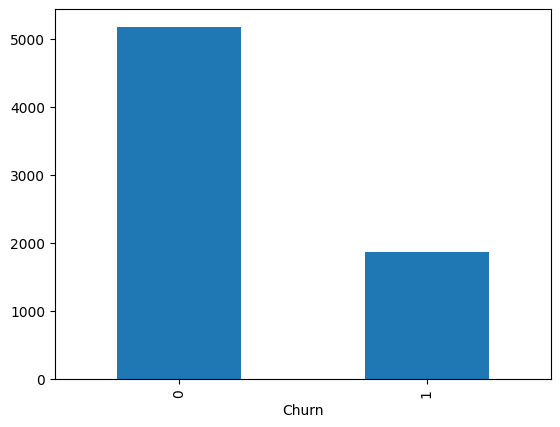

In [205]:
y.value_counts().plot(kind='bar')

In [206]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

### Handle Class Imbalance with SMOTE

In [207]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Axes: title={'center': 'Resampled Y Train'}, xlabel='Churn'>

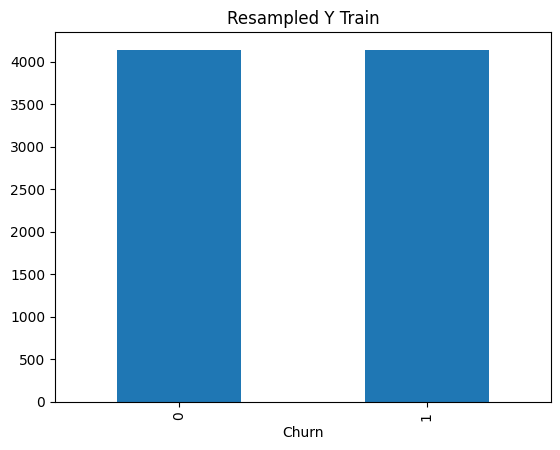

In [208]:
y_train_resampled.value_counts().plot(kind='bar', title="Resampled Y Train")

<Axes: title={'center': 'Y Test'}, xlabel='Churn'>

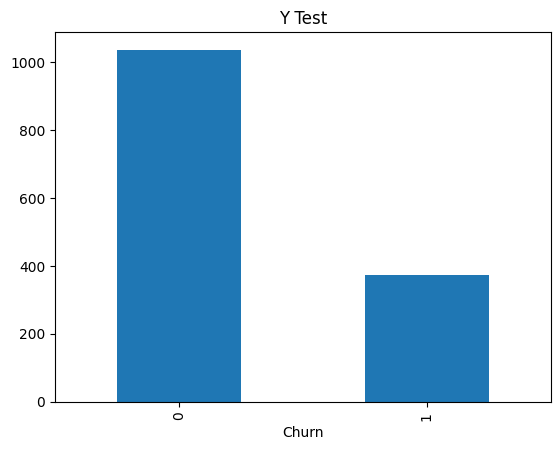

In [209]:
y_test.value_counts().plot(kind='bar', title="Y Test")

### Save npz

In [ ]:
np.savez("../artifacts/X_train", X_train_resampled)
np.savez("../artifacts/Y_train", y_train_resampled)
np.savez("../artifacts/X_test", X_test)
np.savez("../artifacts/Y_test", y_test)

# 07. Train a Base Model

### Import deps

In [211]:
import pandas as pd # Dataset handling
import numpy as np # Math
import seaborn as sns # Viz
import matplotlib.pyplot as plt # viz
from sklearn.ensemble import RandomForestClassifier # Model
from sklearn.linear_model import LogisticRegression # Model
from sklearn.metrics import (
    accuracy_score, # Accuracy
    confusion_matrix, # Confusion Matrix
    classification_report, # Classification Report
    roc_curve, # ROC Curve
    roc_auc_score, # ROC AUC Score
    precision_recall_curve, # Precision Recall Curve
    precision_score, # Precision
    recall_score, # Recall
    f1_score, # F1 Score
)
from tqdm.notebook import tqdm # pretty progress of For Loops

In [212]:
SEED = 42
np.random.seed(SEED)

### Load Data

In [ ]:
X_train = np.load("../artifacts/X_train.npz")["arr_0"]
X_test = np.load("../artifacts/X_test.npz")["arr_0"]
y_train = np.load("../artifacts/Y_train.npz")["arr_0"]
y_test = np.load("../artifacts/Y_test.npz")["arr_0"]



### Train model

In [218]:
model_lr = LogisticRegression(
    random_state=SEED,
    max_iter=1000,
)
model_lr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [219]:
y_hat_train = model_lr.predict(X_train)
y_hat_test = model_lr.predict(X_test)

y_hat_proba_train = model_lr.predict_proba(X_train)
y_hat_proba_test = model_lr.predict_proba(X_test)

In [220]:
acc = accuracy_score(y_test, y_hat_test)
print(f"Accuracy: {acc}")
recall = recall_score(y_test, y_hat_test)
print(f"Recall: {recall}")
precision = precision_score(y_test, y_hat_test)
print(f"Precision: {precision}")
f1 = f1_score(y_test, y_hat_test)
print(f"F1 Score: {f1}")

Accuracy: 0.8183108587650816
Recall: 0.6514745308310992
Precision: 0.6585365853658537
F1 Score: 0.6549865229110512


In [221]:
cm = confusion_matrix(y_test, y_hat_test)


In [222]:
cm

array([[910, 126],
       [130, 243]])

<module 'matplotlib.pyplot' from 'c:\\Users\\trixr\\Downloads\\AI\\Extracted\\Telco Churn\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

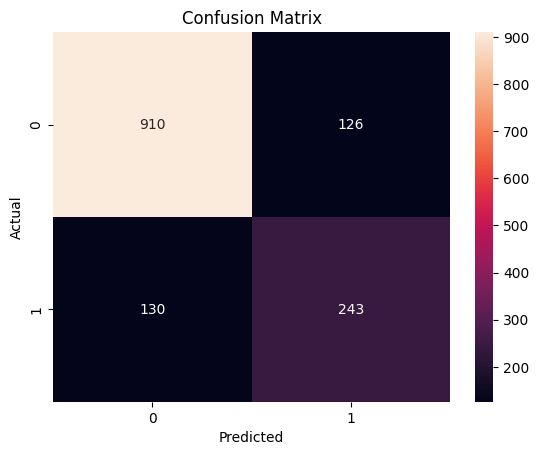

In [223]:

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt

# 08. K-Fold Validation

### deps

In [224]:
import pandas as pd # Dataset handling
import numpy as np # Math
import seaborn as sns # Viz
import matplotlib.pyplot as plt # viz
from sklearn.ensemble import RandomForestClassifier # Model
from sklearn.linear_model import LogisticRegression # Model
from sklearn.model_selection import (
    StratifiedKFold, # K-Fold
    cross_validate
)
from sklearn.metrics import (
    accuracy_score, # Accuracy
    confusion_matrix, # Confusion Matrix
    classification_report, # Classification Report
    roc_curve, # ROC Curve
    roc_auc_score, # ROC AUC Score
    precision_recall_curve, # Precision Recall Curve
    precision_score, # Precision
    recall_score, # Recall
    f1_score, # F1 Score
)
from tqdm.notebook import tqdm # pretty progress of For Loops

In [225]:
SEED = 42
np.random.seed(SEED)

### Load dataset

In [ ]:
X_train = np.load("../artifacts/X_train.npz")["arr_0"]
X_test = np.load("../artifacts/X_test.npz")["arr_0"]
y_train = np.load("../artifacts/Y_train.npz")["arr_0"]
y_test = np.load("../artifacts/Y_test.npz")["arr_0"]



### config K-Fold validation

In [227]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=SEED
)

In [228]:
model_lr = LogisticRegression(
    random_state=SEED,
    max_iter=1000,
)

In [229]:
scores_list = ['accuracy', 'precision', 'recall', 'f1']


In [230]:
for score in scores_list:
  scores = cross_validate(
      model_lr,
      X_train,
      y_train,
      cv=cv,
      scoring=score,
  )
  print(f"{score} : {scores['test_score']}")

accuracy : [0.85205314 0.86102719 0.84048338 0.86102719 0.84712991]
precision : [0.85333333 0.87265918 0.85408805 0.8682266  0.8643853 ]
recall : [0.85024155 0.8452237  0.8210399  0.85144928 0.8236715 ]
f1 : [0.85178463 0.85872236 0.83723798 0.8597561  0.84353741]


### Select more signal , less noiced data set

In [231]:
scores = cross_validate(
      model_lr,
      X_train,
      y_train,
      cv=cv,
      scoring='f1',
  )

In [232]:
fold_indices = list(cv.split(X_train, y_train))

In [233]:
X_train.shape

(8276, 44)

In [234]:
fold_indices[1][1].shape


(1655,)

In [235]:
scores["test_score"]

array([0.85178463, 0.85872236, 0.83723798, 0.8597561 , 0.84353741])

In [236]:
best_idx = np.argmax(scores["test_score"])

In [237]:
best_idx

np.int64(3)

In [238]:
best_train_idx, best_test_idx = fold_indices[best_idx]

X_train_best = X_train[best_train_idx]
y_train_best = y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
y_test_best = y_train[best_test_idx]

### Train with best training data splits

In [239]:
model_lr = LogisticRegression(
    random_state=SEED,
    max_iter=1000,
)
model_lr.fit(X_train_best, y_train_best)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [240]:
y_hat = model_lr.predict(X_test_best)
y_hat_proba = model_lr.predict_proba(X_test_best)

In [241]:
acc = accuracy_score(y_test_best, y_hat)
print(f"Accuracy: {acc}")
recall = recall_score(y_test_best, y_hat)
print(f"Recall: {recall}")
precision = precision_score(y_test_best, y_hat)
print(f"Precision: {precision}")
f1 = f1_score(y_test_best, y_hat)
print(f"F1 Score: {f1}")

Accuracy: 0.8610271903323263
Recall: 0.8514492753623188
Precision: 0.8682266009852216
F1 Score: 0.8597560975609756


In [242]:
y_hat = model_lr.predict(X_test)
y_hat_proba = model_lr.predict_proba(X_test)

In [243]:
acc = accuracy_score(y_test, y_hat)
print(f"Accuracy: {acc}")
recall = recall_score(y_test, y_hat)
print(f"Recall: {recall}")
precision = precision_score(y_test, y_hat)
print(f"Precision: {precision}")
f1 = f1_score(y_test, y_hat)
print(f"F1 Score: {f1}")

Accuracy: 0.8204400283889283
Recall: 0.6621983914209115
Precision: 0.660427807486631
F1 Score: 0.6613119143239625


<module 'matplotlib.pyplot' from 'c:\\Users\\trixr\\Downloads\\AI\\Extracted\\Telco Churn\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

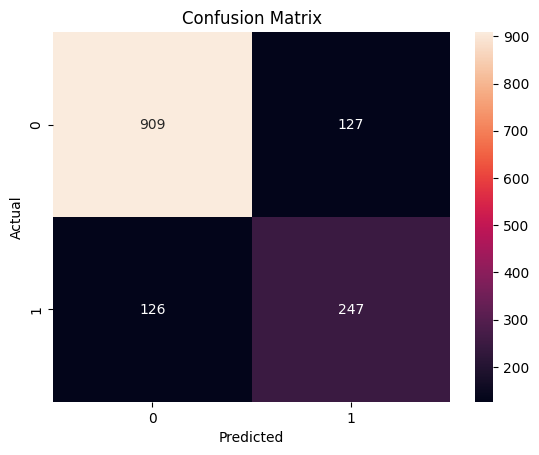

In [244]:
cm = confusion_matrix(y_test, y_hat)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt

# 09. Model Selection

### deps

In [245]:
import pandas as pd # Dataset handling
import numpy as np # Math
import seaborn as sns # Viz
import matplotlib.pyplot as plt # viz
from sklearn.ensemble import RandomForestClassifier # Model
from sklearn.linear_model import LogisticRegression # Model
from sklearn.tree import DecisionTreeClassifier # Model
from sklearn.model_selection import (
    StratifiedKFold, # K-Fold
    cross_validate
)
from sklearn.metrics import (
    accuracy_score, # Accuracy
    confusion_matrix, # Confusion Matrix
    classification_report, # Classification Report
    roc_curve, # ROC Curve
    roc_auc_score, # ROC AUC Score
    precision_recall_curve, # Precision Recall Curve
    precision_score, # Precision
    recall_score, # Recall
    f1_score, # F1 Score
)

from tqdm.notebook import tqdm # pretty progress of For Loops

In [246]:
SEED = 42
np.random.seed(SEED)

### Load dataset

In [ ]:
X_train = np.load("../artifacts/X_train.npz")["arr_0"]
X_test = np.load("../artifacts/X_test.npz")["arr_0"]
y_train = np.load("../artifacts/Y_train.npz")["arr_0"]
y_test = np.load("../artifacts/Y_test.npz")["arr_0"]



### config K-Fold validation

In [249]:
cv = StratifiedKFold(
    n_splits=6,
    shuffle=True,
    random_state=SEED
)

### Define Models

In [250]:
models = {
    "Logistic Regression": LogisticRegression(
        random_state=SEED,
        max_iter=1000,
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=SEED,
    ),
    "Random Forest": RandomForestClassifier(
        random_state=SEED,
    ),
}

### Train

In [251]:
trained_model = {}

for model_name, model in models.items():
  print(f"===={model_name}====")
  scores = cross_validate(
      model,
      X_train,
      y_train,
      cv=cv,
      scoring="f1",
      return_train_score=False,
      return_estimator=True,
  )
  idx = np.argmax(scores["test_score"])
  best_model = scores["estimator"][idx]
  trained_model[model_name] = best_model
  print(f"best f1 : {scores['test_score'][idx]}")
  print("\n")

====Logistic Regression====
best f1 : 0.8590405904059041


====Decision Tree====
best f1 : 0.8162393162393162


====Random Forest====
best f1 : 0.8706395348837209




### Test  

In [252]:
y_hat_results = {}

for model_name, model in trained_model.items():
  y_hat = model.predict(X_test)
  y_hat_results[model_name] = y_hat


In [253]:
cms = {}

for model_name, y_hat in y_hat_results.items():
  cms[model_name] = confusion_matrix(y_test, y_hat)

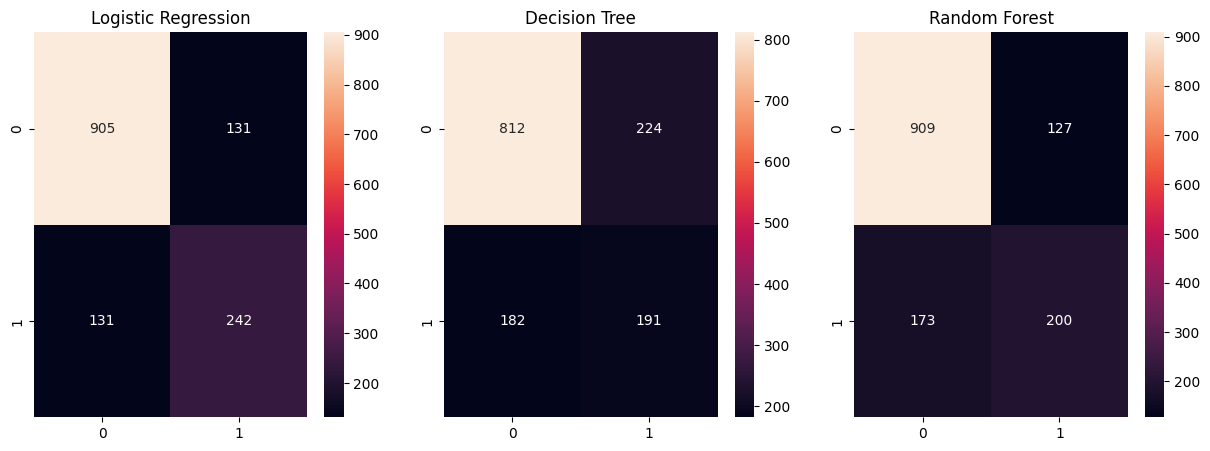

In [254]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (model_name, cm) in zip(axs, cms.items()):
  sns.heatmap(cm, annot=True, fmt="d", ax=ax)
  ax.set_title(model_name)


# 10. Hyper Param Tuning

### deps

In [255]:
import pandas as pd # Dataset handling
import numpy as np # Math
import seaborn as sns # Viz
import matplotlib.pyplot as plt # viz
from sklearn.ensemble import RandomForestClassifier # Model
from sklearn.linear_model import LogisticRegression # Model
from sklearn.tree import DecisionTreeClassifier # Model
from sklearn.model_selection import (
    StratifiedKFold, # K-Fold
    cross_validate,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score, # Accuracy
    confusion_matrix, # Confusion Matrix
    classification_report, # Classification Report
    roc_curve, # ROC Curve
    roc_auc_score, # ROC AUC Score
    precision_recall_curve, # Precision Recall Curve
    precision_score, # Precision
    recall_score, # Recall
    f1_score, # F1 Score
)

from tqdm.notebook import tqdm # pretty progress of For Loops

In [256]:
SEED = 42
np.random.seed(SEED)

### Load dataset

In [ ]:
X_train = np.load("../artifacts/X_train.npz")["arr_0"]
X_test = np.load("../artifacts/X_test.npz")["arr_0"]
y_train = np.load("../artifacts/Y_train.npz")["arr_0"]
y_test = np.load("../artifacts/Y_test.npz")["arr_0"]



### config K-Fold validation

In [259]:
cv = StratifiedKFold(
    n_splits=6,
    shuffle=True,
    random_state=SEED
)

### Define Models

In [260]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

lr_param_grid = {
    "max_iter":[1000, 5000, 10000]
}

dt_param_grid = {
    "max_depth":[8, 12 ,16, 20],
    "criterion":["gini", "entropy", "log_loss"]
}

rf_param_grid = {
    "n_estimators":[50, 100, 200],
    "max_depth":[8, 12, 20],
    "criterion":["gini", "entropy", "log_loss"]
}

param_grid = {
    "Logistic Regression": lr_param_grid,
    "Decision Tree": dt_param_grid,
    "Random Forest": rf_param_grid,
}

### Train

In [261]:
Grid_search_results = {}

for model_name, model in models.items():
  print(f"===={model_name}====")
  scores = GridSearchCV(
      model,
      param_grid[model_name],
      cv=cv,
      scoring="f1",
      return_train_score=False,
      verbose=1
  )
  Grid_search_results[model_name] = scores.fit(
                                          X_train,
                                          y_train,
                                      )

  print("\n")

====Logistic Regression====
Fitting 6 folds for each of 3 candidates, totalling 18 fits


====Decision Tree====
Fitting 6 folds for each of 12 candidates, totalling 72 fits


====Random Forest====
Fitting 6 folds for each of 27 candidates, totalling 162 fits




In [262]:
Grid_search_results

{'Logistic Regression': GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
              estimator=LogisticRegression(),
              param_grid={'max_iter': [1000, 5000, 10000]}, scoring='f1',
              verbose=1),
 'Decision Tree': GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
              estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [8, 12, 16, 20]},
              scoring='f1', verbose=1),
 'Random Forest': GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
              estimator=RandomForestClassifier(),
              param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [8, 12, 20],
                          'n_estimators': [50, 100, 200]},
              scoring='f1', verbose=1)}

### Test  

In [263]:
y_hat_results = {}

for model_name in models.keys():
  y_hat = Grid_search_results[model_name].best_estimator_.predict(X_test)
  y_hat_results[model_name] = y_hat


In [264]:
cms = {}

for model_name, y_hat in y_hat_results.items():
  cms[model_name] = confusion_matrix(y_test, y_hat)

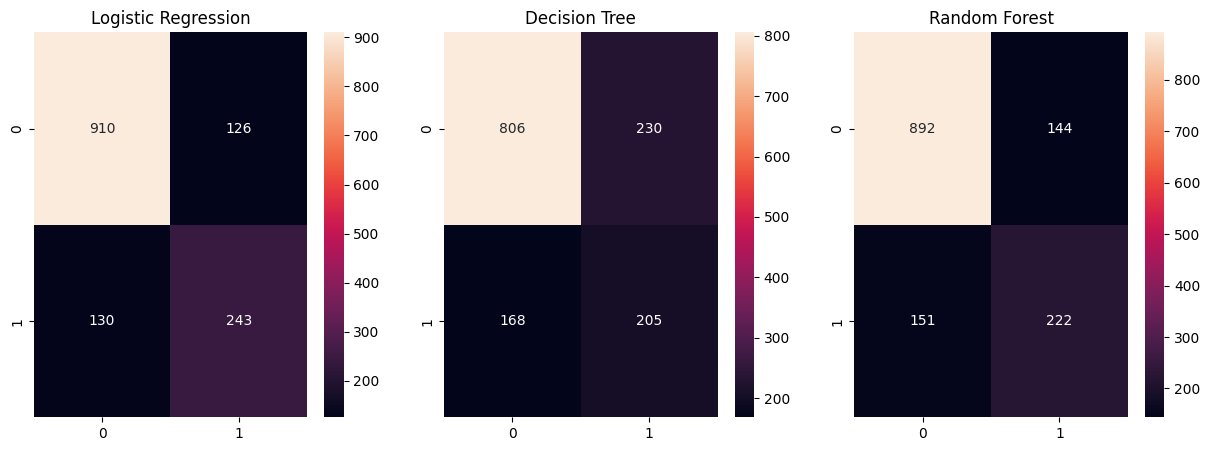

In [265]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (model_name, cm) in zip(axs, cms.items()):
  sns.heatmap(cm, annot=True, fmt="d", ax=ax)
  ax.set_title(model_name)


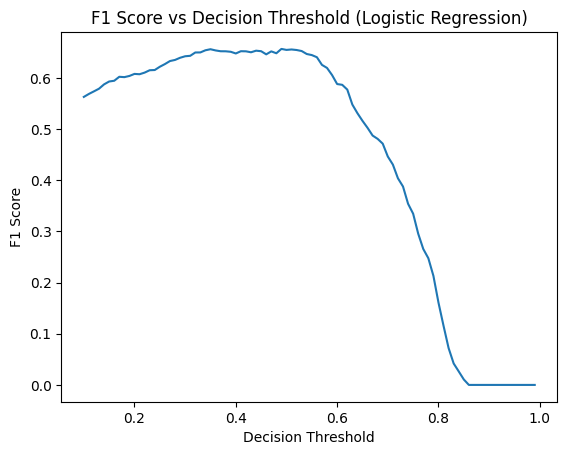

In [266]:
model_lr = Grid_search_results["Logistic Regression"].best_estimator_

thresholds = np.arange(0.1, 1.0, 0.01)
y_hat_proba = model_lr.predict_proba(X_test)[:, 1]

f1_scores = []
cms = []
for threshold in thresholds:
    y_hat = y_hat_proba > threshold
    f1_scores.append(f1_score(y_test, y_hat))
    cms.append(confusion_matrix(y_test, y_hat))
plt.figure()
plt.plot(thresholds, f1_scores)
plt.xlabel("Decision Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Decision Threshold (Logistic Regression)")
plt.show()


In [267]:
idx = np.argmax(np.array(f1_scores))

In [268]:
thresholds[idx]

np.float64(0.48999999999999977)

<Axes: >

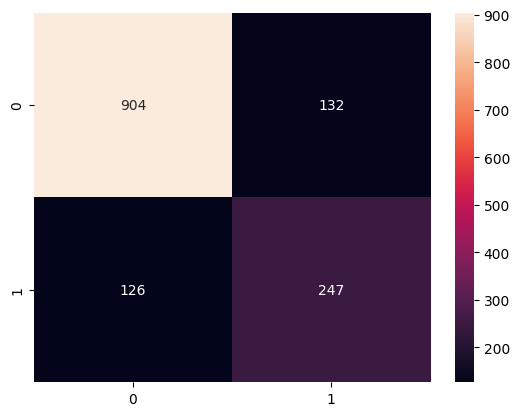

In [269]:
sns.heatmap(
    cms[idx],
    annot=True,
    fmt="d",
)